# Eigenprojection Graph Code

James Yu, 10 November 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# matrix to eigendecompose
A = np.array([
    [0.7, 0.3],
    [0.3, 0.7]
])

eigvals, U = np.linalg.eig(A)
U

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [3]:
x_0 = np.array([[-0.5, 2.5]], ndmin = 2).T
x_0

array([[-0.5],
       [ 2.5]])

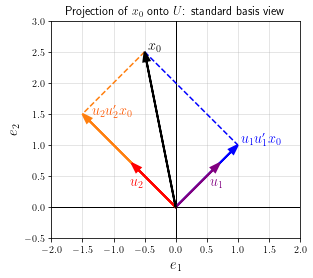

In [4]:
u1 = np.array(U[:,0],ndmin=2).T
u2 = np.array(U[:,1],ndmin=2).T

plt.rcParams.update({"text.usetex": True}) # use LaTeX text font on plots
plt.margins(x = 0, y = 0) # no spaces between axes and plots
plt.gca().set_aspect("equal") # i.e. https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib

plt.axhline(y = 0, color = "black", linewidth = 1)
plt.axvline(x = 0, color = "black", linewidth = 1)
plt.grid(visible = True, zorder = 1, alpha = 0.4)
plt.ylim(-0.5, 3)
plt.xlim(-2, 2)

# eigenvectors
plt.arrow(0, 0, *U[:,0], head_width = 0.1, linewidth = 2, facecolor = "purple", edgecolor = "purple", zorder = 3, length_includes_head=True)
# note this is an origin and length, not a start and end coordinate (but end == length when origin == 0)
plt.arrow(0, 0, *U[:,1], head_width = 0.1, linewidth = 2, facecolor = "red", edgecolor = "red", zorder = 3, length_includes_head=True)

# x
plt.arrow(0, 0, *x_0[:,0], head_width = 0.1, linewidth = 2, facecolor = "black", edgecolor = "black", zorder = 4, length_includes_head=True)

# projection of x onto eigenvectors
u1u1tx0 = (u1 @ u1.T @ x_0).flatten()
u2u2tx0 = (u2 @ u2.T @ x_0).flatten()
plt.arrow(0, 0, *u1u1tx0, linewidth = 2, head_width = 0.1, facecolor = "blue", edgecolor = "blue", zorder = 2, length_includes_head=True) 
plt.arrow(0, 0, *u2u2tx0, linewidth = 2, head_width = 0.1, facecolor = "tab:orange", edgecolor = "tab:orange", zorder = 2, length_includes_head=True)

# projection lines
plt.plot(np.linspace(x_0[0,0], u1u1tx0[0], 100), np.linspace(x_0[1,0], u1u1tx0[1], 100), '--', color = "blue", zorder = 2)
plt.plot(np.linspace(x_0[0,0], u2u2tx0[0], 100), np.linspace(x_0[1,0], u2u2tx0[1], 100), '--', color = "tab:orange", zorder = 2)

# labels
plt.xlabel("$e_1$", size = "x-large")
plt.ylabel("$e_2$", size = "x-large")
plt.title("Projection of $x_0$ onto $U$: standard basis view")
plt.text(x_0[0,0]+0.05,x_0[1,0]+0.05,"$x_0$", size = "x-large")
plt.text(U[0,0]-0.15,U[1,0]-0.35,"$u_1$", size = "x-large", color = "purple")
plt.text(U[0,1]-0.03,U[1,1]-0.35,"$u_2$", size = "x-large", color = "red")
plt.text(u1u1tx0[0]+0.05,u1u1tx0[1]+0.05,"$u_1u_1^\prime x_0$", size = "x-large", color = "blue")
plt.text(u2u2tx0[0]+0.15,u2u2tx0[1],"$u_2u_2^\prime x_0$", size = "x-large", color = "#ff5900")
plt.savefig("standard.png", dpi = 800, facecolor = "white")

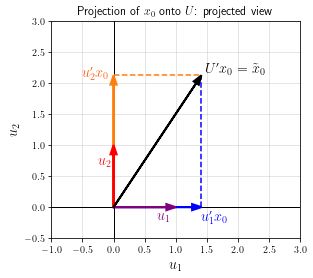

In [5]:
plt.gca().set_aspect("equal") # i.e. https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib

plt.axhline(y = 0, color = "black", linewidth = 1)
plt.axvline(x = 0, color = "black", linewidth = 1)
plt.grid(visible = True, zorder = 1, alpha = 0.4)
plt.ylim(-0.5, 3)
plt.xlim(-1, 3)

# eigenvectors
plt.arrow(0, 0, 1, 0, head_width = 0.1, linewidth = 2, facecolor = "purple", edgecolor = "purple", zorder = 3, length_includes_head=True)
# note this is an origin and length, not a start and end coordinate (but end == length when origin == 0)
plt.arrow(0, 0, 0, 1, head_width = 0.1, linewidth = 2, facecolor = "red", edgecolor = "red", zorder = 3, length_includes_head=True)

# \tilde x
plt.arrow(0, 0, *(U.T @ x_0)[:,0], head_width = 0.1, linewidth = 2, facecolor = "black", edgecolor = "black", zorder = 4, length_includes_head=True)

# projection of x onto eigenvectors
u1tx0, u1tx1 = (*(U.T @ x_0)[:,0],)
plt.arrow(0, 0, u1tx0, 0, linewidth = 2, head_width = 0.1, facecolor = "blue", edgecolor = "blue", zorder = 2, length_includes_head=True) 
plt.arrow(0, 0, 0, u1tx1, linewidth = 2, head_width = 0.1, facecolor = "tab:orange", edgecolor = "tab:orange", zorder = 2, length_includes_head=True)

# projection lines
plt.plot([u1tx0]*100, np.linspace(0, u1tx1, 100), '--', color = "blue", zorder = 2)
plt.plot(np.linspace(0, u1tx0, 100), [u1tx1]*100, '--', color = "tab:orange", zorder = 2)

# labels
plt.xlabel("$u_1$", size = "x-large")
plt.ylabel("$u_2$", size = "x-large")
plt.title("Projection of $x_0$ onto $U$: projected view")
plt.text(u1tx0+0.05,u1tx1+0.05,r"$U^\prime x_0 = \tilde{x}_0$", size = "x-large")
plt.text(0.7,0-0.2,"$u_1$", size = "x-large", color = "purple")
plt.text(0-0.25,0.7,"$u_2$", size = "x-large", color = "red")
plt.text(u1tx0,0-0.2,"$u_1^\prime x_0$", size = "x-large", color = "blue")
plt.text(0-0.5,u1tx1,"$u_2^\prime x_0$", size = "x-large", color = "#ff5900")
plt.savefig("projected.png", dpi = 800, facecolor = "white")